Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

In [89]:
# Library Imports
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [90]:
# fetch dataset 
iranian_churn = fetch_ucirepo(id=563) 
  
# data (as pandas dataframes) 
X = iranian_churn.data.features 
y = iranian_churn.data.targets 
  
# metadata 
print(iranian_churn.metadata) 
  
# variable information 
print(iranian_churn.variables) 

DatasetNotFoundError: Error reading data csv file for "Iranian Churn" dataset (id=563).

In [ ]:
df = pd.concat([X, y], axis=1)

print(df)

     X  Y month day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5     3   5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4    10   2  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4    10   6  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6     3   5  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6     3   7  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ..   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3     8   7  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4     8   7  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4     8   7  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4     8   6  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3    11   2  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


## Data Exploration

**TASK: Create a correlation heatmap.**

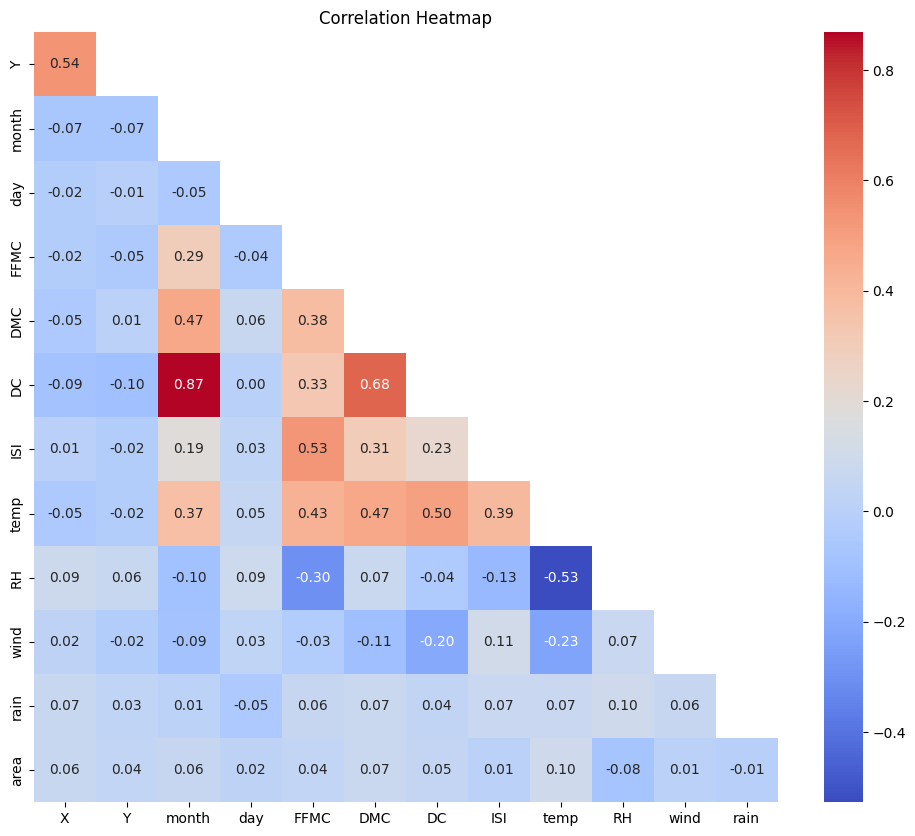

In [ ]:
# --- CREATING A CORRELATION PLOT --- 
correlation_heatmap = df.corr()

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(correlation_heatmap, dtype=bool))
mask[np.triu_indices_from(mask)] = True

df_corr_viz = correlation_heatmap.mask(mask).dropna(how='all').dropna(axis=1, how='all')

sns.heatmap(df_corr_viz, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')

plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [ ]:
correlation_with_target = df.corrwith(X.iloc[:, -1]).abs()

sorted_correlation = correlation_with_target.sort_values(ascending=False)

top_correlated_features = sorted_correlation.head(5)

top_correlated_features_rounded = top_correlated_features.round(6)

print("The top 5 correlated frequencies with the target/label:\n")
print(top_correlated_features)

The top 5 correlated frequencies with the target/label:

rain    1.000000
RH      0.099751
DMC     0.074790
temp    0.069491
ISI     0.067668
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (465, 12)
y_train: (465, 1)
X_test: (52, 12)
y_test: (52, 1)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsRegressor())  
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [ ]:
param_grid = {'knn__n_neighbors': list(range(1,20))}
pipeline.set_params(knn=KNeighborsRegressor())

full_cv_regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
full_cv_regressor.fit(X_train, y_train)

print("The best parameters are:")

param_dict = full_cv_regressor.best_estimator_.get_params()
full_cv_regressor.best_estimator_.get_params()

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

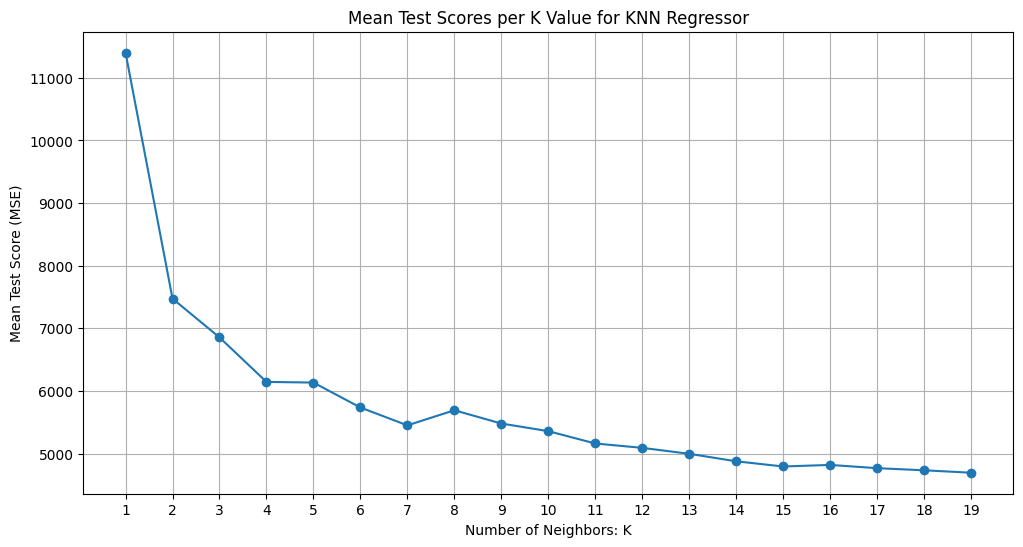

In [ ]:
mean_test_scores = full_cv_regressor.cv_results_['mean_test_score']
k_values = param_grid['knn__n_neighbors']

mean_test_scores = -mean_test_scores

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Test Scores for Different K Values')
plt.grid(True)
plt.show()


### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [100]:
y_bin = (y_train > 0.5).astype(int)
y_pred_bin = (full_cv_regressor.predict(X_train) > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_bin, y_pred_bin, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_bin, y_pred_bin))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       227
           1       0.51      1.00      0.68       238

    accuracy                           0.51       465
   macro avg       0.76      0.50      0.34       465
weighted avg       0.75      0.51      0.35       465

Confusion Matrix:
[[  0 227]
 [  0 238]]
